In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0


In [6]:
DATASET_PATH = "animal_data" 
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='rgb' 
)

val_generator = test_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'  
)

NUM_CLASSES = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print("Class Labels:", class_names)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.
Class Labels: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [7]:
def build_vgg16():
    base = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)

def build_resnet50():
    base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)

def build_mobilenetv2():
    base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)

def build_efficientnet():
    base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224,224,3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=base.input, outputs=output)



In [8]:
def train_model(model, name, epochs=10):
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        verbose=1
    )

    val_loss, val_acc = model.evaluate(val_generator)
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    return model, history, val_acc


In [10]:
models_dict = {
    "VGG16": build_vgg16(),
    "ResNet50": build_resnet50(),
    "MobileNetV2": build_mobilenetv2(),
}

results = {}

for name, mdl in models_dict.items():
    print("\n🔹 Training:", name)
    m, h, acc = train_model(mdl, name, epochs=10)
    results[name] = (m, h, acc)

# Pick best model
best_model_name = max(results, key=lambda x: results[x][2])
best_model = results[best_model_name][0]

print(f"\n🏆 Best Model: {best_model_name} with accuracy {results[best_model_name][2]:.4f}")

# Save the best model
best_model.save("best_model.h5")



🔹 Training: VGG16


C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.0692 - loss: 2.9273 - val_accuracy: 0.0966 - val_loss: 2.7338
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 372s 8s/step - accuracy: 0.0846 - loss: 2.7993 - val_accuracy: 0.0966 - val_loss: 2.6818
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 285s 6s/step - accuracy: 0.0839 - loss: 2.7622 - val_accuracy: 0.1619 - val_loss: 2.6522
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 277s 6s/step - accuracy: 0.1127 - loss: 2.7040 - val_accuracy: 0.1854 - val_loss: 2.6293
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.1192 - loss: 2.6714 - val_accuracy: 0.2193 - val_loss: 2.6069
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.1473 - loss: 2.6218 - val_accuracy: 0.2533 - val_loss: 2.5811
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.1646 - loss: 2.5858 - val_accuracy: 0.2742 - val_loss: 2.5581
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.1730 - loss: 2.5730 - val_accuracy: 0.2611 - v

MobileNetV2 Validation Accuracy: 0.8747

🏆 Best Model: MobileNetV2 with accuracy 0.8747


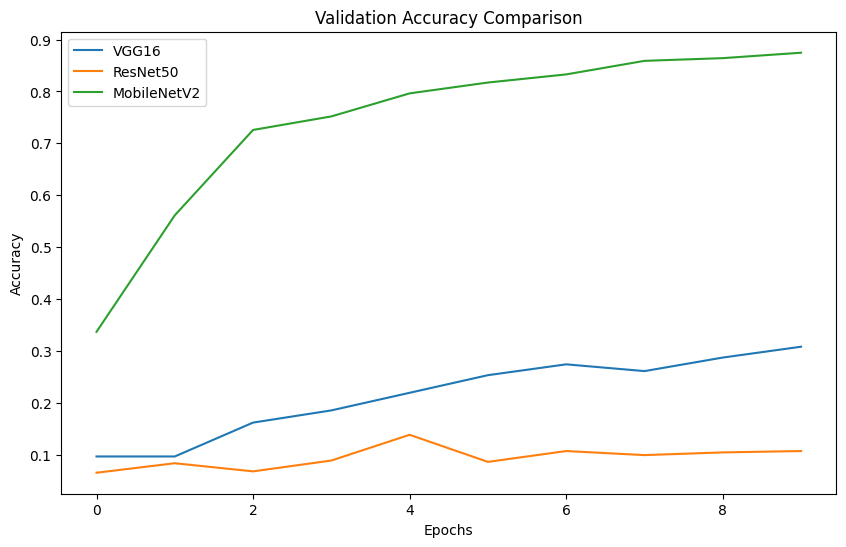

In [11]:
plt.figure(figsize=(10,6))
for name, (_, h, _) in results.items():
    plt.plot(h.history['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


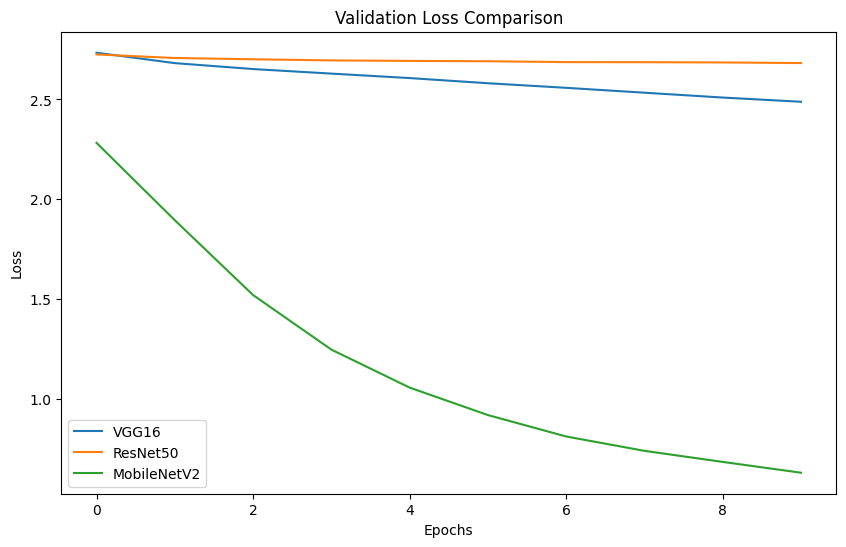

In [12]:
plt.figure(figsize=(10,6))
for name, (_, h, _) in results.items():
    plt.plot(h.history['val_loss'], label=f'{name}')
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
from tensorflow.keras.preprocessing import image

def predict_sample(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = best_model.predict(img_array)
    pred_class = class_names[np.argmax(preds)]
    confidence = np.max(preds) * 100

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)")
    plt.show()



In [15]:
best_model.save("mobilenetv2_best.keras")


In [16]:
from tensorflow.keras.models import load_model
model = load_model("mobilenetv2_best.keras")


C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
